In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print('Train Columns: ' + str(df_train.columns.size))
print()
print('Train Rows: ' + str(df_train.index.size))
df_train.head()

Train Columns: 81

Train Rows: 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Test Columns: ' + str(df_test.columns.size))
print()
print('Test Rows: ' + str(df_test.index.size))
df_test.head()

Test Columns: 80

Test Rows: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Missing Values

In [5]:
import missingno as msno

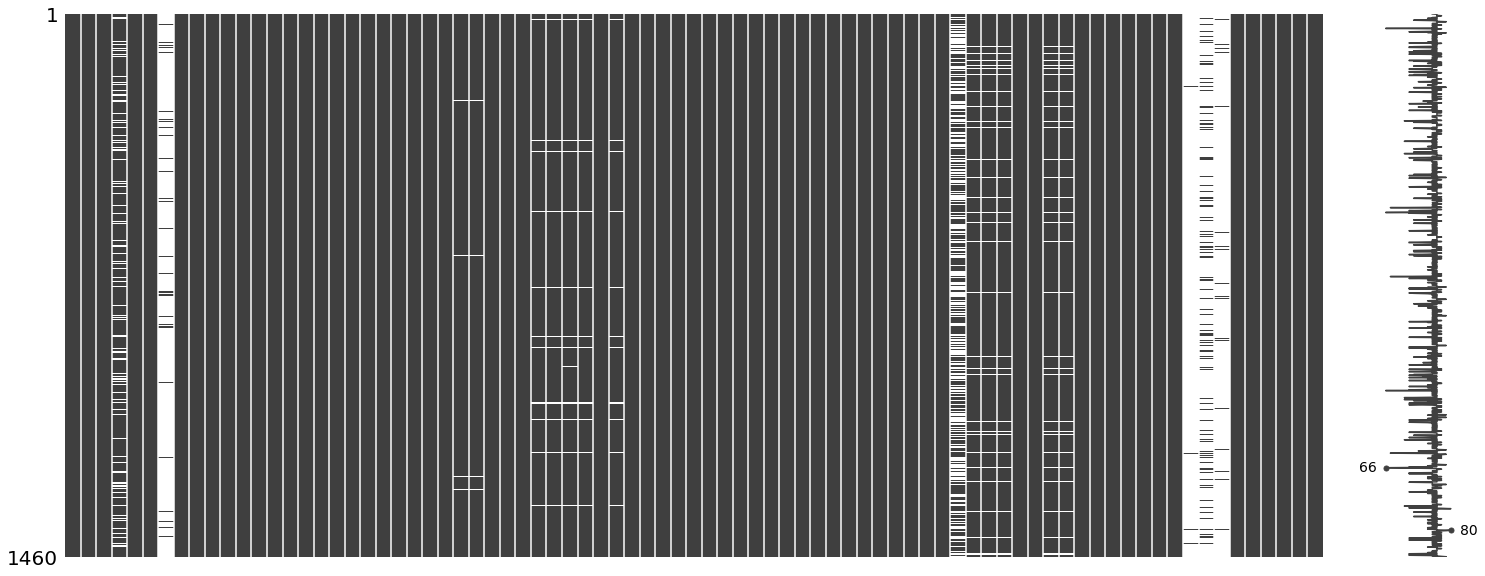

In [6]:
msno.matrix(df_train)

In [7]:
def missingPercentage(df):
    columns = df.columns
    total = int(df.index.size)
    feature = []
    percentage = []
    
    for c in columns:
        p = (df[c].isnull().sum()/total)*100
        if p>0:
            feature.append(c)
            percentage.append(p)
        
    df_missing = pd.DataFrame()
    df_missing['Feature'] = feature
    df_missing['Percentage'] = percentage
    df_missing = df_missing.sort_values(by=['Percentage'] , ascending=0)
    return df_missing

In [8]:
a = missingPercentage(df_train)
print('features with missing values in train : ' + str(len(a)))
a

features with missing values in train : 19


,Feature,Percentage
16,PoolQC,99.520548
18,MiscFeature,96.301370
1,Alley,93.767123
17,Fence,80.753425
10,FireplaceQu,47.260274
0,LotFrontage,17.739726
11,GarageType,5.547945
12,GarageYrBlt,5.547945
13,GarageFinish,5.547945
14,GarageQual,5.547945


In [9]:
b = missingPercentage(df_test)
print('features with missing values in test : ' + str(len(b)))
b

features with missing values in test : 33


,Feature,Percentage
29,PoolQC,99.794380
31,MiscFeature,96.504455
2,Alley,92.666210
30,Fence,80.123372
21,FireplaceQu,50.034270
1,LotFrontage,15.558602
28,GarageCond,5.346127
23,GarageYrBlt,5.346127
27,GarageQual,5.346127
24,GarageFinish,5.346127


# Target Variable

We will check if the target variable is normally distributed 

It is a very imprtant assumption in multiple linear regression

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


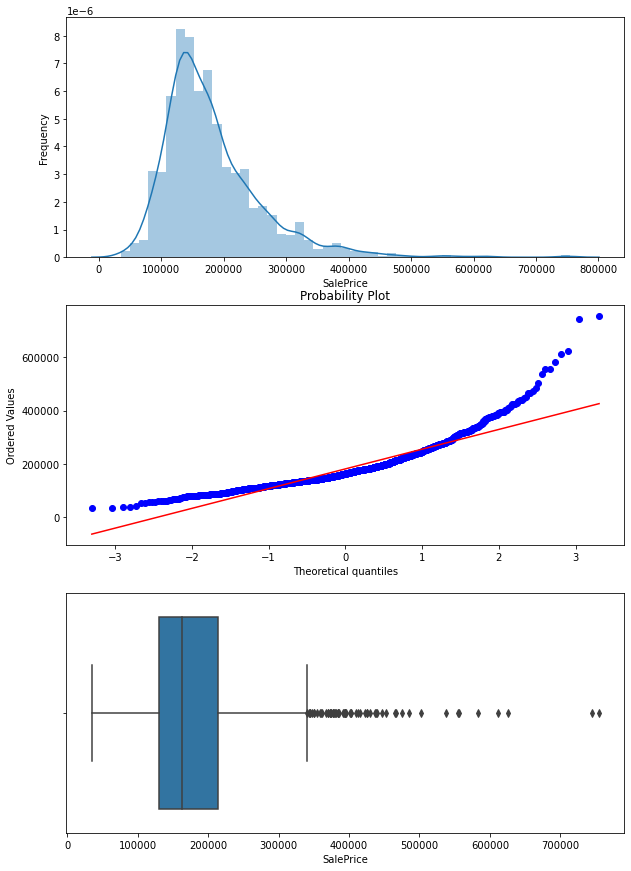

In [10]:
fig , ax = plt.subplots(3,1 , figsize =(10,15))
from scipy import stats
sns.distplot(df_train['SalePrice'] , ax=ax[0])
print("Skewness: " + str(df_train['SalePrice'].skew()))
print("Kurtosis: " + str(df_train['SalePrice'].kurt()))
ax[0].set(ylabel = 'Frequency' , xlabel = 'SalePrice')
stats.probplot(df_train['SalePrice'] , plot=ax[1])
sns.boxplot(df_train['SalePrice'] , ax=ax[2])
plt.show()

# Corelation of features with SalePrice

In [11]:
a = df_train.corr()['SalePrice']
corrSP = pd.DataFrame()
corrSP['features'] = a.index
corrSP['correlation'] = a.values
corrSP.sort_values(by=['correlation'] , ascending = 0)


,features,correlation
37,SalePrice,1.000000
4,OverallQual,0.790982
16,GrLivArea,0.708624
26,GarageCars,0.640409
27,GarageArea,0.623431
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
6,YearBuilt,0.522897


## Using correlations to examine top features  

the features that are most related with SP are prone to outliers

In [12]:
def boxPlots(var):
    ax = sns.boxplot(df_train[var] , df_train['SalePrice'])
    ax.set(xlabel=var , ylabel = 'SalePrice' , title= var + ' vs SalePrice')

In [13]:
def scatterPlots(var):
    ax = sns.scatterplot(df_train[var] , df_train['SalePrice'])
    ax.set(xlabel=var , ylabel='SalePrice', title= var + ' vs SalePrice')

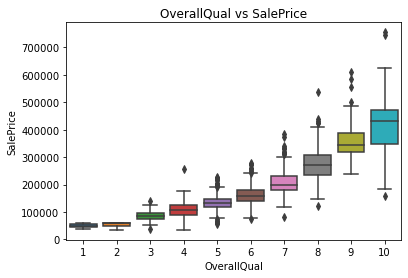

In [14]:
boxPlots('OverallQual')

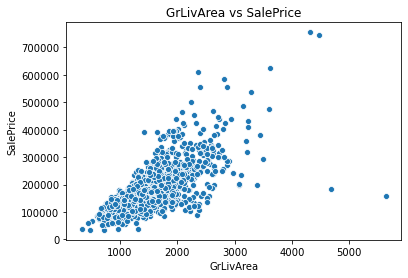

In [15]:
scatterPlots('GrLivArea')

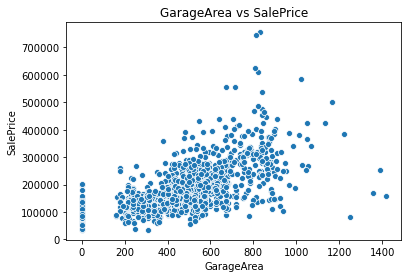

In [16]:
scatterPlots('GarageArea')

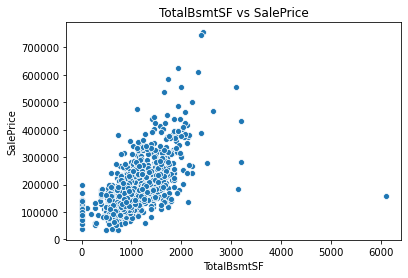

In [17]:
scatterPlots('TotalBsmtSF')

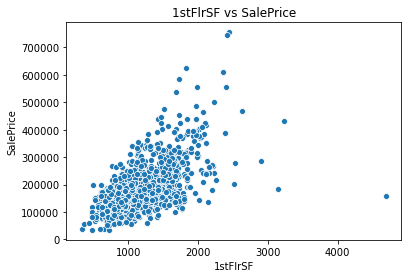

In [18]:
scatterPlots('1stFlrSF')

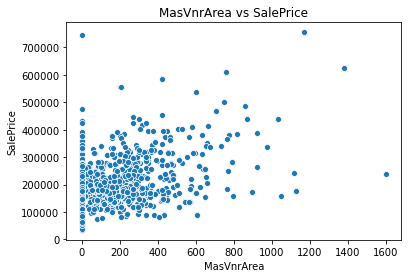

In [19]:
scatterPlots('MasVnrArea')

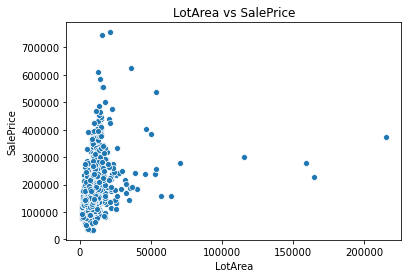

In [20]:
scatterPlots('LotArea')

### Assumptions of multiple regression

#### 1. Linear relationship
#### 2. Homoscedasticity (constant variance)
#### 3. Independence of errors
#### 4. Error Normality
#### 5. No Multicollinearity


### Lets Start by checking Linearity

In [21]:
def scatterLinearityCheck(var):
    ax = sns.scatterplot(df_train[var] , df_train['SalePrice'])
    sns.regplot(df_train[var] , df_train['SalePrice'])
    ax.set(xlabel=var , ylabel='SalePrice', title= var + ' Linearity Check')

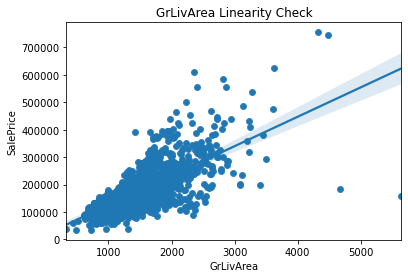

In [22]:
scatterLinearityCheck('GrLivArea')

remove outlier x>4000 y<300000

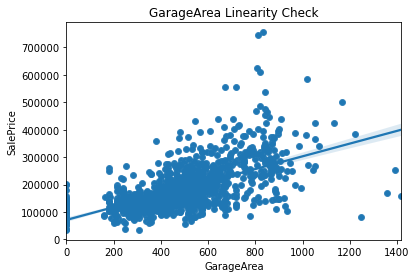

In [23]:
scatterLinearityCheck('GarageArea')

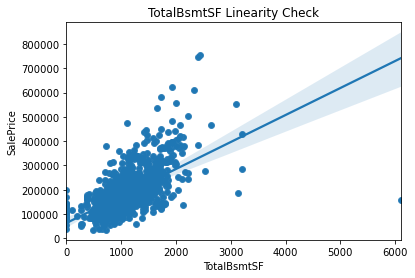

In [24]:
scatterLinearityCheck('TotalBsmtSF')

remove outlier x>5500 y<300000

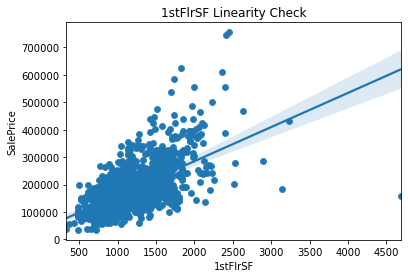

In [25]:
scatterLinearityCheck('1stFlrSF')

remove outlier x>4000 y<200000

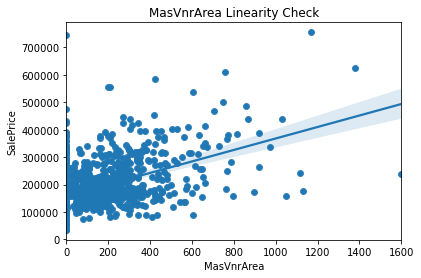

In [26]:
scatterLinearityCheck('MasVnrArea')

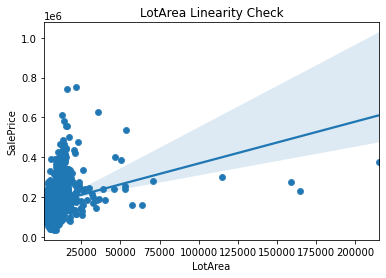

In [27]:
scatterLinearityCheck('LotArea')

remove outlier x>150000 y<400000

### Now lets see the error variance and the homoscedasticity

We will look at the residual plot for this

It will tell us about how much our error varies from the reg line

Our error variance must remain constant and hence we should follow homoscedasticity

If it doesn't then we must make the SalePrice column Normal

In [28]:
def scatterVarCheck(var):
    #ax = sns.scatterplot(df_train[var] , df_train['SalePrice'])
    ax = sns.residplot(df_train[var] , df_train['SalePrice'])
    ax.set(xlabel=var , ylabel='SalePrice', title= var + ' Variance Check')
    plt.show()

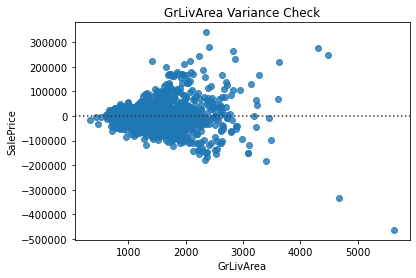

In [29]:
scatterVarCheck('GrLivArea')

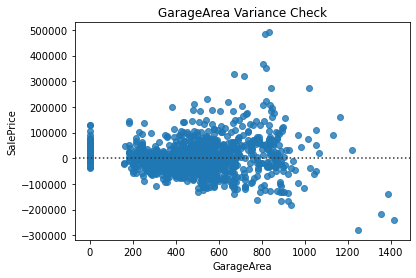

In [30]:
scatterVarCheck('GarageArea')

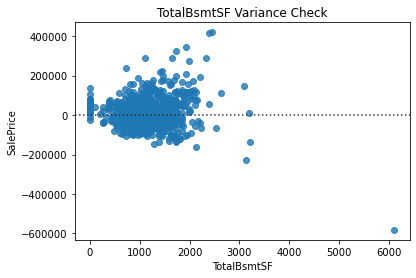

In [31]:
scatterVarCheck('TotalBsmtSF')

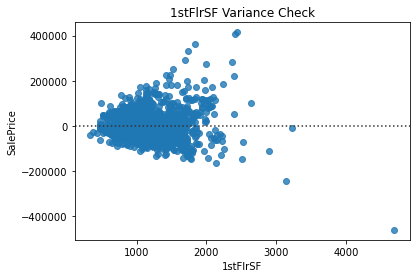

In [32]:
scatterVarCheck('1stFlrSF')

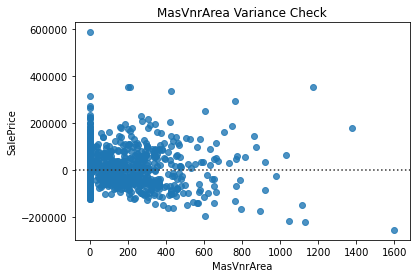

In [33]:
scatterVarCheck('MasVnrArea')

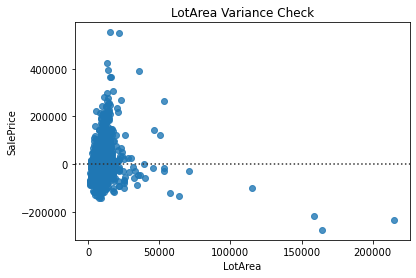

In [34]:
scatterVarCheck('LotArea')

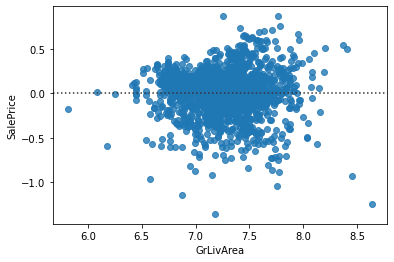

In [35]:
# see how transforming both gave us a better and a constant variance about the error line
# however we will officially do this after doing all the tests
t = np.log1p(df_train['SalePrice'])
g = np.log1p(df_train['GrLivArea'])
sns.residplot(g, t)
#ax.set(xlabel='GrLivArea' , ylabel='SalePrice', title=' Variance Check')

### Now let us check multicollinearity

Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

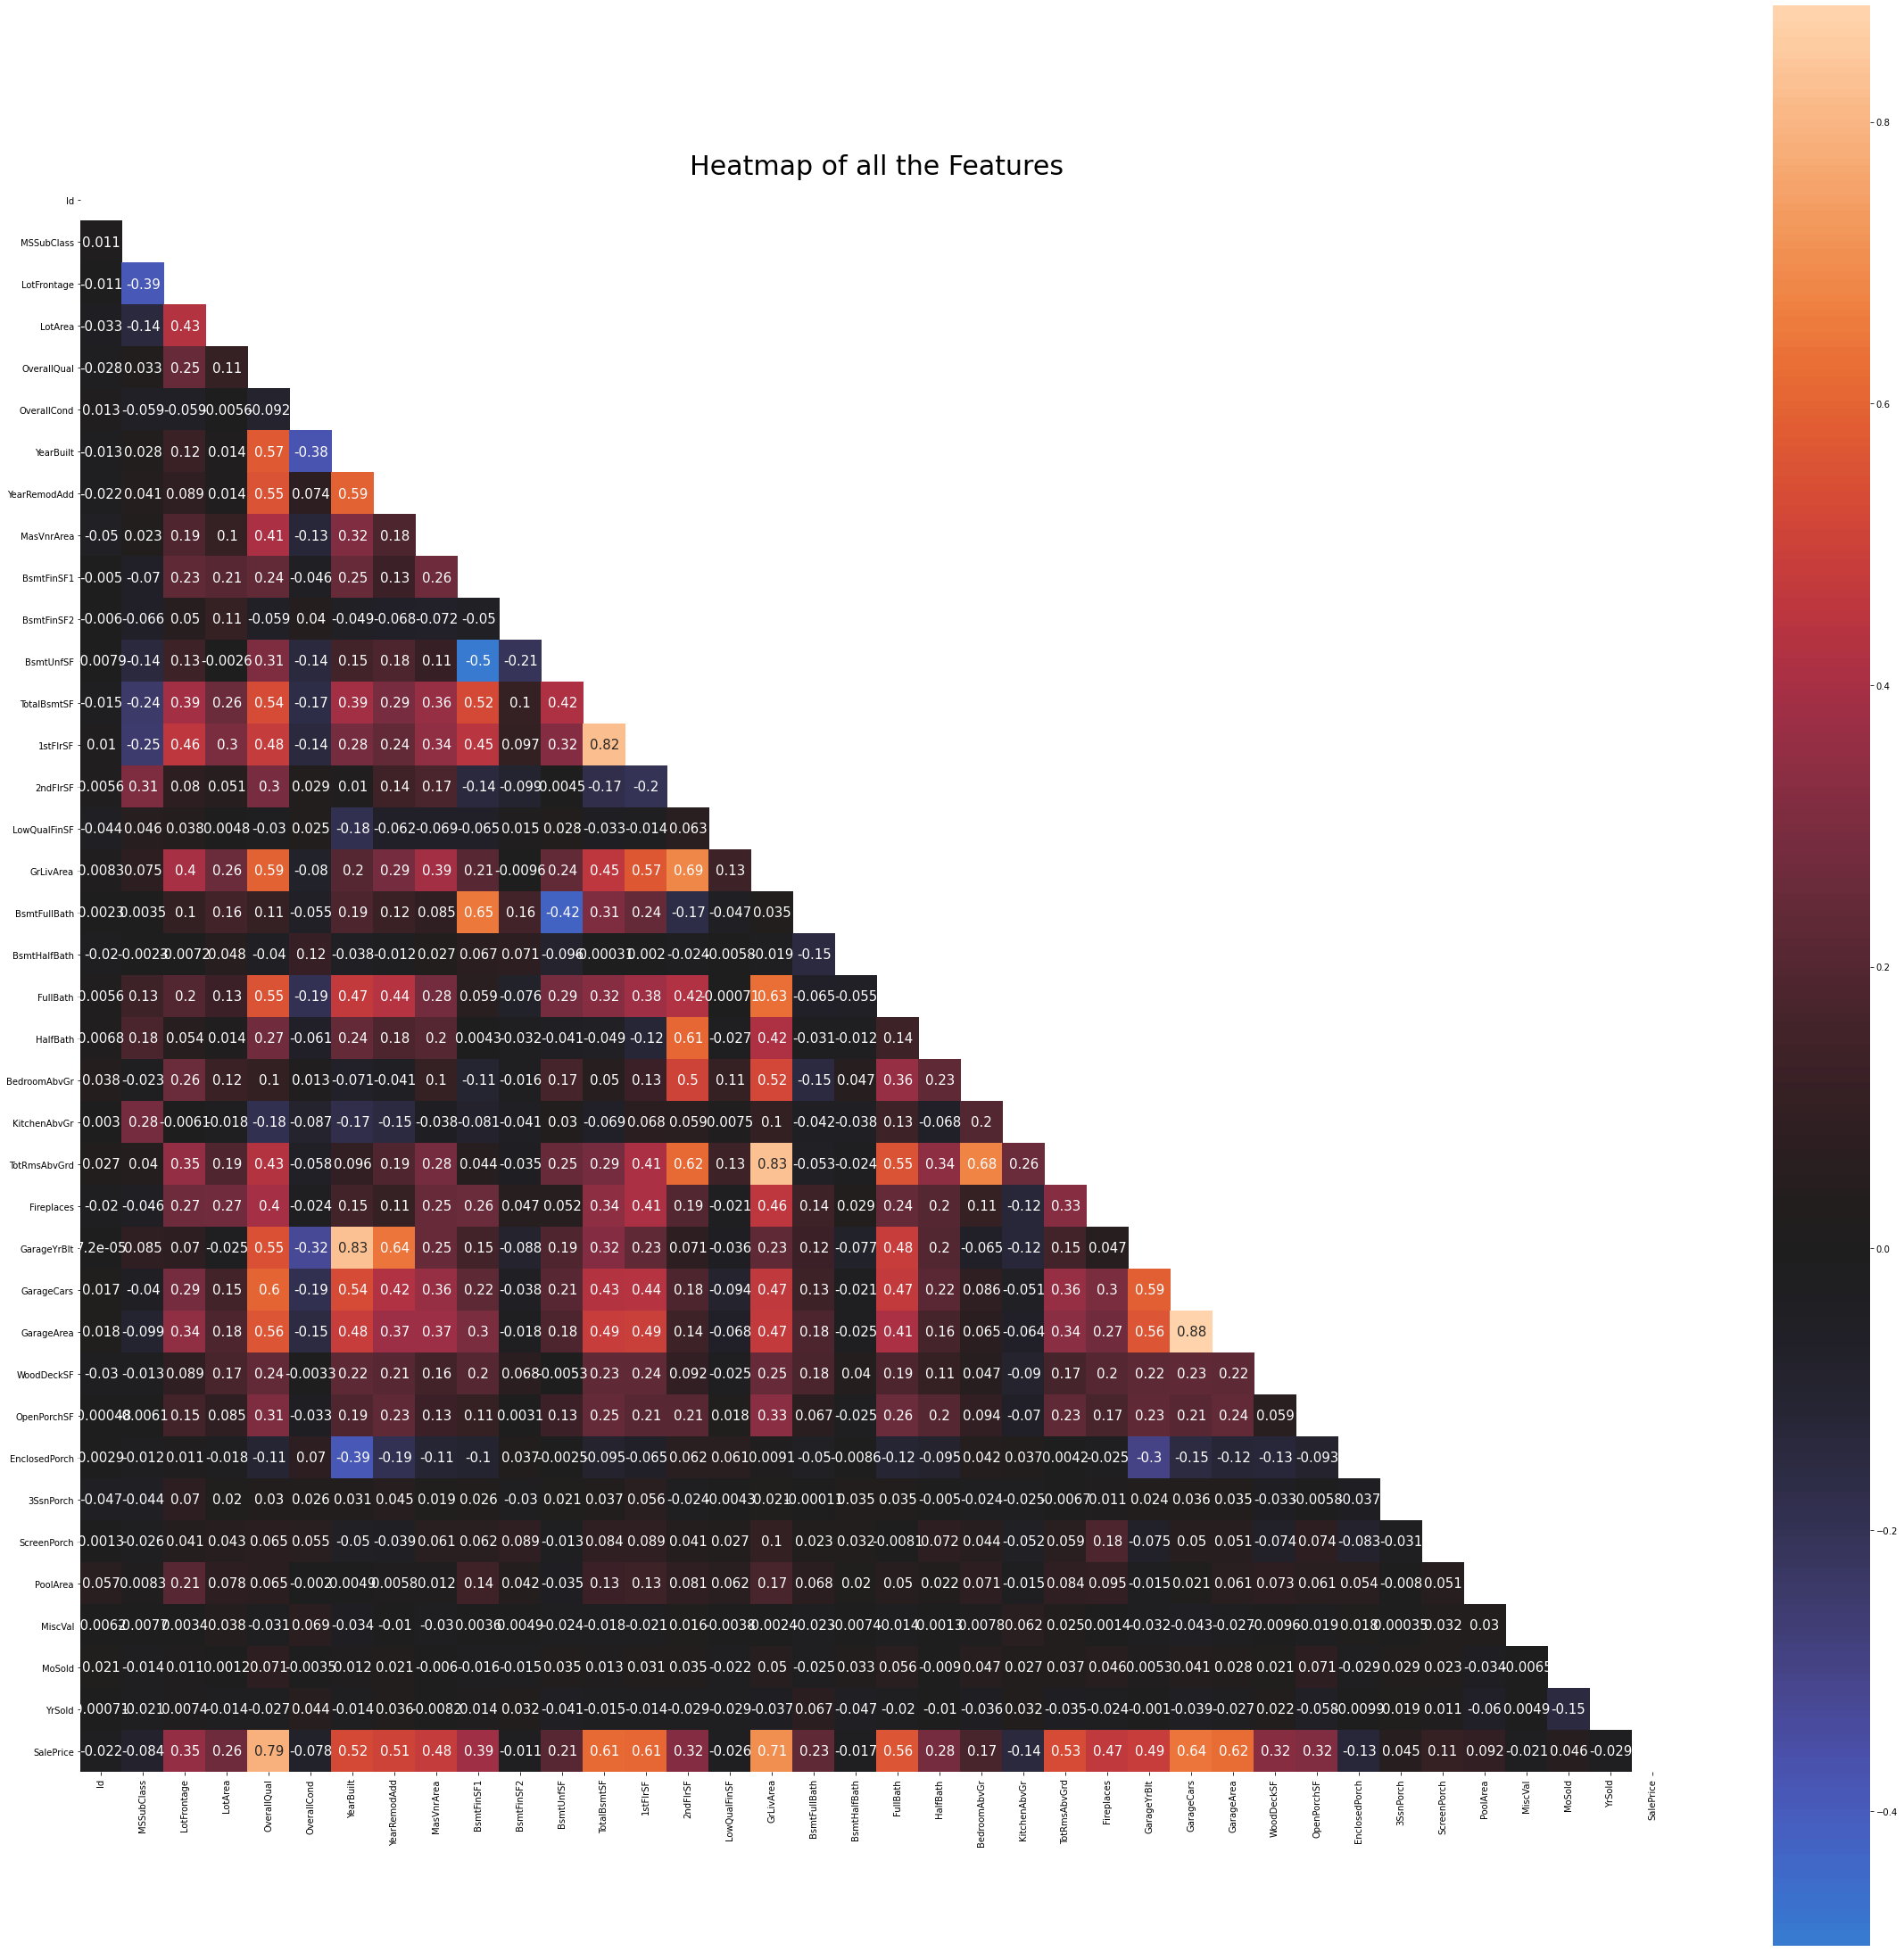

In [36]:
#style.use('ggplot')
#sns.set_style('whitegrid')
plt.subplots(figsize = (40,40))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_train.corr(), 
            mask = mask, 
            annot=True, 
            center = 0,
            square=True,
            annot_kws={'size': 15}
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

GarageYrBlt vs YearBuilt (0.83)

1stFlrSF vs TotalBsmtSF (0.82)

GarageCar vs GarageArea (0.88)

TotalRmsAbvGrd vs GrLivArea (0.83)

The author of the reference notebook keeps these as he is going to use lasso and ridge regressions

"If I were using only multiple linear regression, I would be deleting these features from the dataset to fit better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible outcome. Therefore, we will keep all the features for now."

all_data = pd.concat([df_train , df_test] , axis=0)
all_data

### We have identified most of the problems and now we will fix them 

# Fixing the SalePrice 

In [37]:
# we had seen the positive skewness of the SalePrice variable and hence we will apply a log1p transformation to it

df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


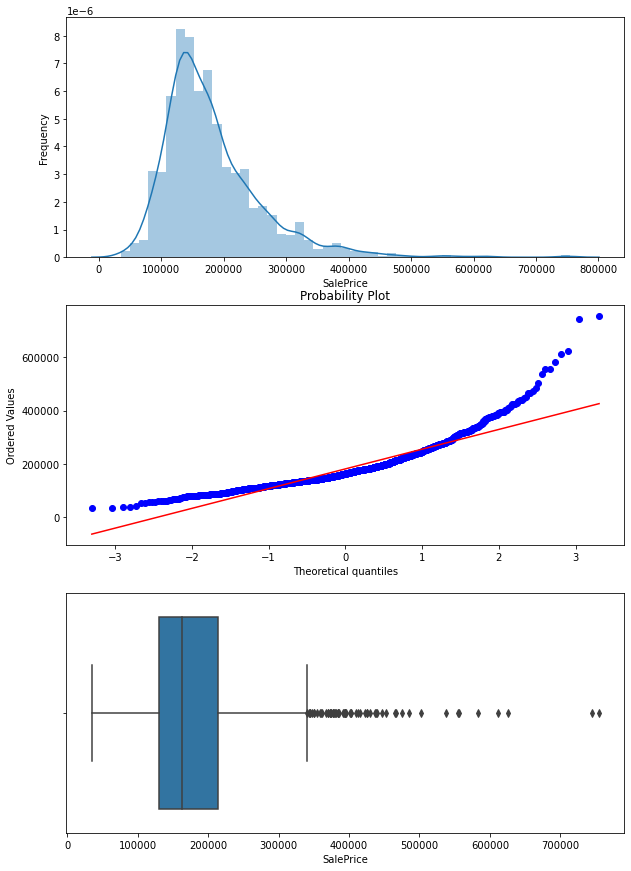

In [38]:
# previous state of SalePrice just for recap

fig , ax = plt.subplots(3,1 , figsize =(10,15))
from scipy import stats
sns.distplot(df_train['SalePrice'] , ax=ax[0])
print("Skewness: " + str(df_train['SalePrice'].skew()))
print("Kurtosis: " + str(df_train['SalePrice'].kurt()))
ax[0].set(ylabel = 'Frequency' , xlabel = 'SalePrice')
stats.probplot(df_train['SalePrice'] , plot=ax[1])
sns.boxplot(df_train['SalePrice'] , ax=ax[2])
plt.show()

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


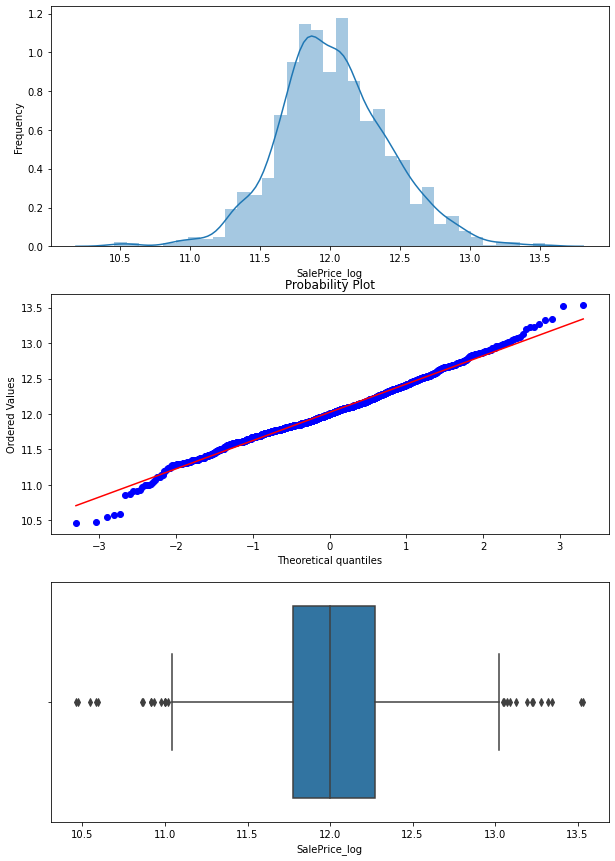

In [39]:
fig , ax = plt.subplots(3,1 , figsize =(10,15))
sns.distplot(df_train['SalePrice_log'] , ax=ax[0])
print("Skewness: " + str(df_train['SalePrice_log'].skew()))
print("Kurtosis: " + str(df_train['SalePrice_log'].kurt()))
ax[0].set(ylabel = 'Frequency' , xlabel = 'SalePrice_log')
stats.probplot(df_train['SalePrice_log'] , plot=ax[1])
sns.boxplot(df_train['SalePrice_log'] , ax=ax[2])
plt.show()

Hence we have normalized the SalePrice variable and we have already fixed so many problems it caused with its high skewness

# Removing Outliers from train data

In [40]:
def outlierRemoveScatter(var , ax , b):
    sns.scatterplot(df_train[var] , df_train['SalePrice'] , ax = ax)
    sns.regplot(df_train[var] , df_train['SalePrice'] , ax = ax)
    if b=="b":
        ax.set(xlabel=var , ylabel='SalePrice', title= 'BEFORE')
    elif b=='a':
        ax.set(xlabel=var , ylabel='SalePrice', title= 'AFTER')

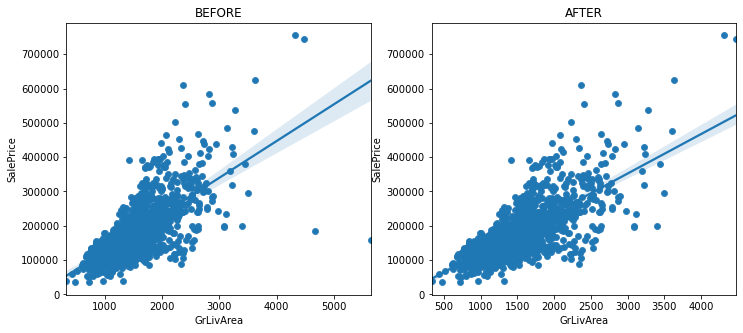

In [41]:
fig , ax = plt.subplots(1 , 2 , figsize=(12,5))
outlierRemoveScatter('GrLivArea' , ax[0] , 'b')
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
outlierRemoveScatter('GrLivArea' , ax[1] , 'a')
plt.show()

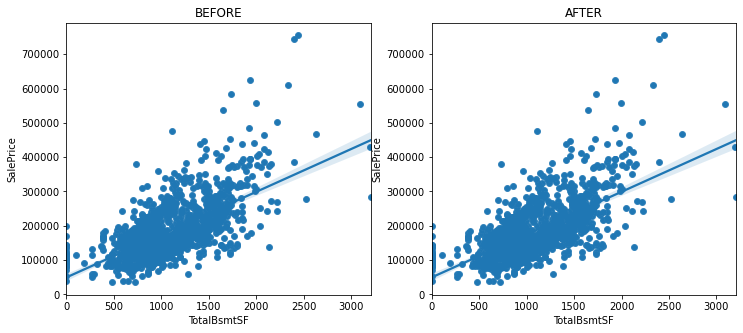

In [42]:
fig , ax = plt.subplots(1 , 2 , figsize=(12,5))
outlierRemoveScatter('TotalBsmtSF' , ax[0] , 'b')
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5500)].index)
outlierRemoveScatter('TotalBsmtSF' , ax[1] , 'a')
plt.show()

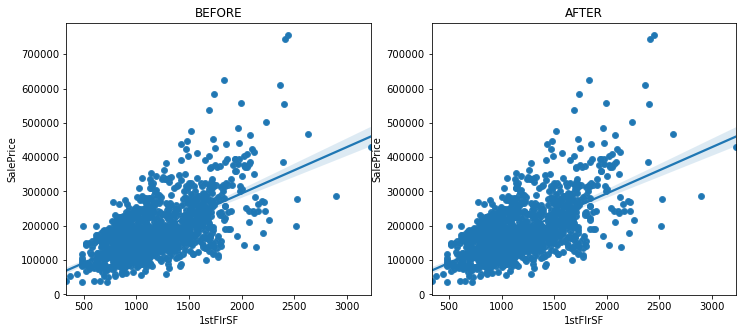

In [43]:
fig , ax = plt.subplots(1 , 2 , figsize=(12,5))
outlierRemoveScatter('1stFlrSF' , ax[0] , 'b')
df_train = df_train.drop(df_train[(df_train['1stFlrSF']>4000)].index)
outlierRemoveScatter('1stFlrSF' , ax[1] , 'a')
plt.show()

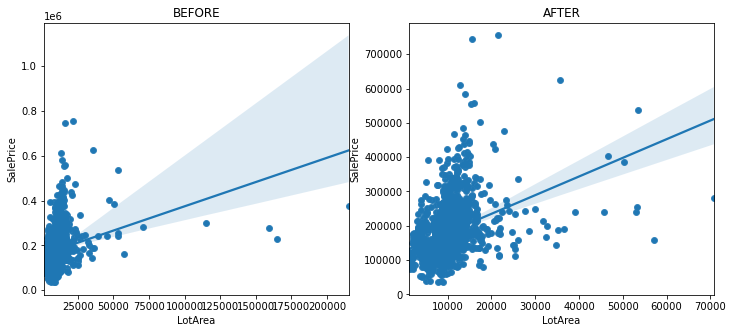

In [44]:
fig , ax = plt.subplots(1 , 2 , figsize=(12,5))
outlierRemoveScatter('LotArea' , ax[0] , 'b')
df_train = df_train.drop(df_train[(df_train['LotArea']>100000)].index)
outlierRemoveScatter('LotArea' , ax[1] , 'a')
plt.show()

In [45]:
df_train.index.size

1454

we removed 6 outliers

The outlier from GrLiv caused removal of outlier of Total and first floor SF

# Handling Nans

In [46]:
# first we will concatenate train and test data
all_data = pd.concat([df_train , df_test] , axis=0)
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,NaN


In [47]:
all_data = all_data.drop(['SalePrice'] , axis = 1)
all_data = all_data.drop(['SalePrice_log'] , axis = 1)

In [48]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [49]:
missingPercentage(all_data)

,Feature,Percentage
30,PoolQC,99.691040
32,MiscFeature,96.464126
2,Alley,93.202884
31,Fence,80.398215
22,FireplaceQu,48.746996
1,LotFrontage,16.580844
25,GarageFinish,5.458290
28,GarageQual,5.458290
29,GarageCond,5.458290
24,GarageYrBlt,5.458290


although you may be tempted to remove values which have over 95% Nans, you shouldn't as they may be there due to absence of the feature.

Hence fillna 'None'

In [50]:
# Firstly PoolQC must be removed as PoolQC is null but PoolArea does not have as many Nans
all_data = all_data.drop(['PoolQC'],axis=1)

In [51]:
# Now lets collect all the categorical columns that need to have to be filled with 'None' at Nan
No = ['MiscFeature' , 'Alley' , 'Fence' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 'BsmtExposure' 
 , 'BsmtCond' , 'BsmtQual' , 'BsmtFinType2' , 'BsmtFinType1' , 'MasVnrType' , 'MSZoning']

for n in No:
    all_data[n] = all_data[n].fillna('None')

In [52]:
# Now lets collect all the numerical columns that need to have to be filled with 0 at Nan
zero = [ 'GarageYrBlt' , 'GarageCars' , 'GarageArea' , 'BsmtFullBath' , 'BsmtHalfBath' , 'TotalBsmtSF' , 'BsmtFinSF2' 
, 'BsmtFinSF1' , 'BsmtUnfSF' , 'MasVnrArea' ]
for z in zero:
    all_data[z] = all_data[z].fillna(0)

In [53]:
# mode
mode = ['SaleType' , 'Functional' , 'KitchenQual' , 'Exterior1st' , 'Exterior2nd' , 'Electrical']
for m in mode:
    all_data[m] = all_data[m].fillna(all_data[m].mode()[0])

In [54]:
# mean group by neighbourhood
['LotFrontage']
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))

In [55]:
all_data = all_data.drop(['Utilities'] , axis=1)

In [56]:
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x : 1 if x>0 else 0)

In [57]:
missingPercentage(all_data)

,Feature,Percentage


We have succesfully removed Nans

### Now we will convert numerical categories into string

In [58]:
nts = ['MSSubClass' , 'OverallQual' , 'OverallCond' , 'YearBuilt' , 'YearRemodAdd' , 'GarageYrBlt' , 'HasPool' , 'MoSold' , 
       'YrSold' , ]

for n in nts:
    all_data[n] = all_data[n].astype(str)


### Now we will adjust skewness of all numeric categories with high skewness

In [59]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,None,None,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,None,None,0,9,2008,WD,Normal,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,None,None,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,None,None,0,12,2008,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,0


In [60]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [61]:
feats = []
skew = []

for n in numeric_feats:
    feats.append(n)
    skew.append(all_data[n].skew())
    
df_skew = pd.DataFrame()
df_skew['Features'] = feats
df_skew['Skew'] = skew

df_skew = df_skew.sort_values(by = ['Skew'] , ascending=0)
df_skew

,Features,Skew
28,MiscVal,21.959083
27,PoolArea,17.685525
10,LowQualFinSF,12.082312
25,3SsnPorch,11.369962
17,KitchenAbvGr,4.299354
5,BsmtFinSF2,4.161408
24,EnclosedPorch,4.001309
26,ScreenPorch,3.943946
13,BsmtHalfBath,3.943319
2,LotArea,3.591605


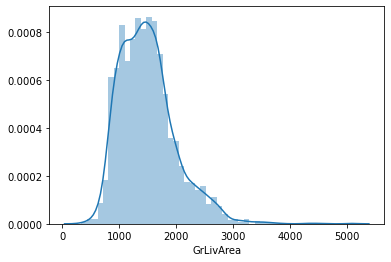

In [62]:
sns.distplot(all_data['GrLivArea'])

In [63]:
df_high_skew = df_skew[df_skew['Skew'] > 0.5]
df_high_skew

,Features,Skew
28,MiscVal,21.959083
27,PoolArea,17.685525
10,LowQualFinSF,12.082312
25,3SsnPorch,11.369962
17,KitchenAbvGr,4.299354
5,BsmtFinSF2,4.161408
24,EnclosedPorch,4.001309
26,ScreenPorch,3.943946
13,BsmtHalfBath,3.943319
2,LotArea,3.591605


In [64]:
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

feats = df_high_skew['Features'].values
for f in feats:
    all_data[f] = boxcox1p(all_data[f] , 0.15)

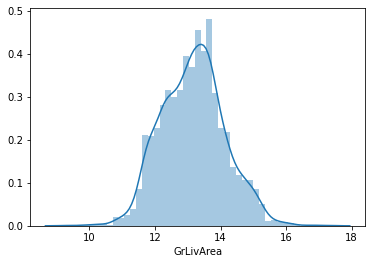

In [65]:
sns.distplot(all_data['GrLivArea'])

### Now lets create dummy variables

In [66]:
df_train.index.size

1454

In [67]:
df_test.index.size

1459

In [68]:
B = pd.get_dummies(all_data , drop_first=True)
X_ohe = B[:1454]
X_ohe_test = B[1454:]
Y = df_train['SalePrice_log']

In [69]:
X_ohe.index.size

1454

In [70]:
X_ohe_test.index.size

1459

In [71]:
X_ohe

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasPool_1
0,1,5.831328,19.212182,8.059126,11.170327,0.000000,7.483296,11.692623,11.692623,11.686189,...,0,0,0,1,0,0,0,1,0,0
1,2,6.221214,19.712205,0.000000,12.062832,0.000000,8.897844,12.792276,12.792276,0.000000,...,0,0,0,1,0,0,0,1,0,0
2,3,5.914940,20.347241,7.646538,10.200343,0.000000,9.917060,11.892039,11.892039,11.724598,...,0,0,0,1,0,0,0,1,0,0
3,4,5.684507,19.691553,0.000000,8.274266,0.000000,10.468500,11.354094,12.013683,11.354094,...,0,0,0,1,0,0,0,0,0,0
4,5,6.314735,21.325160,9.391827,10.971129,0.000000,10.221051,12.510588,12.510588,12.271365,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5.744420,18.960528,0.000000,0.000000,0.000000,11.990298,11.990298,11.990298,11.124583,...,0,0,0,1,0,0,0,1,0,0
1456,1457,6.337529,20.994868,7.003881,11.473247,7.659675,10.692807,13.385607,14.295205,0.000000,...,0,0,0,1,0,0,0,1,0,0
1457,1458,5.859551,19.476345,0.000000,8.823108,0.000000,11.759412,12.528113,12.616840,12.528113,...,0,0,0,1,0,0,0,1,0,0
1458,1459,5.914940,19.760176,0.000000,5.321541,12.206046,0.000000,12.338074,12.338074,0.000000,...,0,0,0,1,0,0,0,1,0,0


In [72]:
X_ohe_test

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasPool_1
0,1461,6.221214,20.479373,0.000000,10.105326,7.397498,8.780689,11.775114,11.818680,0.000000,...,0,0,0,1,0,0,0,1,0,0
1,1462,6.244956,21.327220,6.808145,11.901094,0.000000,9.752379,12.943735,12.943735,0.000000,...,0,0,0,1,0,0,0,1,0,0
2,1463,6.073289,21.196905,0.000000,11.476685,0.000000,7.293500,11.916131,11.916131,11.151348,...,0,0,0,1,0,0,0,1,0,0
3,1464,6.172972,19.865444,3.858807,10.749651,0.000000,9.207511,11.910125,11.910125,11.062536,...,0,0,0,1,0,0,0,1,0,0
4,1465,5.093857,17.257255,0.000000,8.720170,0.000000,12.172900,12.833625,12.833625,0.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,3.932510,14.081426,0.000000,0.000000,0.000000,10.496872,10.496872,10.496872,10.496872,...,0,0,0,1,0,0,0,1,0,0
1455,2916,3.932510,14.013314,0.000000,8.622254,0.000000,8.978567,10.496872,10.496872,10.496872,...,0,0,0,1,0,0,0,0,0,0
1456,2917,7.620056,22.782058,0.000000,12.703313,0.000000,0.000000,12.703313,12.703313,0.000000,...,0,0,0,1,0,0,0,0,0,0
1457,2918,5.744420,20.046557,0.000000,9.301176,0.000000,10.630386,11.867769,12.039794,0.000000,...,0,0,0,1,0,0,0,1,0,0


# Modelling

In [73]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

In [74]:
kfold = KFold(10 , shuffle = True , random_state=42)

def rmsle_cv(model):
    rmse = np.sqrt(-cross_val_score(model , X_ohe.values , Y.values , scoring="neg_mean_squared_error" , cv = kfold))
    return(rmse)
    

In [75]:
ridge = make_pipeline(RobustScaler() , RidgeCV(alphas=[10.6] , cv=kfold))
score = rmsle_cv(ridge)
print(score.mean())

0.11811810434017714


In [76]:
# aa = [0.0001,0.00015 , 0.0002 , 0.00025 , 0.0003 , 0.00035 , 0.0004 , 0.00045 , 0.0005 , 0.0006 , 0.00065 , 0.0007 , 0.00075 , 0.0008 , 0.00085 , 0.0009 , 0.00095, 0.001]
# for a in aa:
#     lasso = make_pipeline(RobustScaler() , LassoCV(alphas = [a], cv=kfold , random_state=42 ))
#     score = rmsle_cv(lasso)
#     print(a)
#     print(score.mean())  
#0.0005

lasso = make_pipeline(RobustScaler() , LassoCV(alphas = [0.0005], cv=kfold , random_state=42 ))
score = rmsle_cv(lasso)
print(score.mean())  

0.11669936037617079


In [77]:
# lr = [ 0.05, 0.06 , 0.07 , 0.08 , 0.09,0.1, 0.11 ]
# aa = [ 0.05, 0.06 , 0.07 , 0.08 , 0.09,0.1, 0.11 ]
# for l in lr:
#     for a in aa:
#         elasticNet = make_pipeline(RobustScaler() , ElasticNetCV(alphas = [a] , l1_ratio=[l] , max_iter=1e7))
#         print('l : ' + str(l))
#         print('a : ' + str(a))
#         print('score : ' + str(rmsle_cv(elasticNet).mean()))
#         print()
elasticNet = make_pipeline(RobustScaler() , ElasticNetCV(alphas = [0.05] , l1_ratio=[0.05] , max_iter=1e7))
rmsle_cv(elasticNet).mean()

0.14210961995782947

In [78]:
# cc = [0.1 , 1 , 10 , 15, 20 , 30 , 40 , 50]
# gg = [ 0.0005, 0.005 , 0.05 , 0.5 ,1]
# for c in cc:
#     for g in gg:
#         svr = make_pipeline(RobustScaler() , SVR(gamma=g , C=c))
#         print('c :' + str (c))
#         print('g:' + str (g))
#         print(rmsle_cv(svr).mean())
        
# # 10 / 0.0005
svr = make_pipeline(RobustScaler() , SVR(gamma=0.0005 , C=10))
rmsle_cv(svr).mean()

0.120573149799112

In [79]:
ne = [3000,4000,5000]
lr = [0.0001 , 0.001 , 0.01 , 0.1]
md = [3,4,5]
msl = [15,20]
mss = [10,15]

minim = 1000000
final = {}

# for n in ne:
#     for l in lr:
#         for m in md:
#             for ml in msl:
#                 for ms in mss:
#                     gbr = GradientBoostingRegressor(n_estimators=n, learning_rate=l, max_depth=m,max_features='sqrt', min_samples_leaf=ml, min_samples_split=ms, loss='huber', random_state =42)
#                     score = rmsle_cv(gbr).mean()
#                     if score < minim:
#                         minim = score
#                         final['ne'] = n
#                         final['lr'] = l
#                         final['md'] = m
#                         final['msl'] = ml
#                         final['mss'] = ms
#                         final['score'] = minim

# print(final)

In [80]:
gbr = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.01, max_depth=4,max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
rmsle_cv(gbr).mean()

0.11829900109256102

In [81]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
rmsle_cv(xgboost).mean()

array([0.12091765, 0.14018872, 0.1044239 , 0.14197096, 0.12185672,
       0.11582992, 0.12007613, 0.13216575, 0.10511912, 0.13241066])

In [82]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticNet, xgboost, svr,gbr),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [83]:
stack_gen_model = stack_gen.fit(X_ohe.values, Y.values)
print('stack fit')
ridge_full_model = ridge.fit(X_ohe.values , Y.values)
print('ridge fit')
lasso_full_model = lasso.fit(X_ohe.values , Y.values)
print('lasso fit')


stack fit
ridge fit
lasso fit


In [84]:
elasticNet_full_model = elasticNet.fit(X_ohe.values , Y.values)
print('EN fir')
svr_full_model = svr.fit(X_ohe.values , Y.values)
print('svr fit')
gbr_full_model = gbr.fit(X_ohe.values , Y.values)
print('gbr fit')
xg_full_model = xgboost.fit(X_ohe.values , Y.values)
print('xg fit')

EN fir
svr fit
gbr fit
xg fit


In [85]:
def blendModels(X):
    return ((0.1 * elasticNet_full_model.predict(X)) + 
            (0.05 * lasso_full_model.predict(X)) + 
            (0.2 * ridge_full_model.predict(X)) + 
            (0.1 * svr_full_model.predict(X)) + 
            (0.1 * gbr_full_model.predict(X)) + 
            (0.15 * xg_full_model.predict(X)) + 
            #(0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(X)))

In [86]:
a = blendModels(X_ohe.values)
a

array([12.22507173, 12.10074645, 12.28404423, ..., 12.42293025,
       11.85396408, 11.90970986])

In [87]:
np.sqrt(mean_squared_error(a,Y.values))

0.07301655030044309

In [88]:
final = blendModels(X_ohe_test.values)

In [89]:
import math
e = math.e

In [90]:
final_SP = np.power(e , final)
final_SP

array([119203.8193071 , 156379.74741824, 192652.39729481, ...,
       164565.52150057, 111116.65439901, 207978.225326  ])

In [91]:
Id = df_test.Id

In [92]:
sub = pd.DataFrame()

In [93]:
sub['id'] = Id
sub['SalePrice'] = final_SP
sub

,id,SalePrice
0,1461,119203.819307
1,1462,156379.747418
2,1463,192652.397295
3,1464,197363.270049
4,1465,187004.554742
...,...,...
1454,2915,82761.711704
1455,2916,82084.352497
1456,2917,164565.521501
1457,2918,111116.654399


In [94]:
sub.to_csv('submission.csv',index=False)

In [100]:
import tensorflow as tf

In [101]:
tf.__version__

'2.3.0'

In [102]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [124]:
nn = {}
nn['en'] = elasticNet_full_model.predict(X_ohe.values)
nn['lasso'] = lasso_full_model.predict(X_ohe.values)
nn['ridge'] = ridge_full_model.predict(X_ohe.values)
nn['svr'] = svr_full_model.predict(X_ohe.values)
nn['gbr'] = gbr_full_model.predict(X_ohe.values)
nn['xgboost'] = xg_full_model.predict(X_ohe.values)
nn['stack'] = stack_gen_model.predict(X_ohe.values)

nn

{'en': array([12.25000704, 12.04528832, 12.34686051, ..., 12.23978211,
        11.82589621, 11.93498653]),
 'lasso': array([12.23738824, 12.13209163, 12.30202513, ..., 12.41246148,
        11.8398114 , 11.89356547]),
 'ridge': array([12.2379868 , 12.15458659, 12.29494871, ..., 12.4127891 ,
        11.86966103, 11.89234864]),
 'svr': array([12.23086982, 12.11775539, 12.29867397, ..., 12.39342445,
        11.84439355, 11.87712768]),
 'gbr': array([12.22817321, 12.07030388, 12.26843902, ..., 12.45988923,
        11.84661407, 11.92389501]),
 'xgboost': array([12.213603, 12.052347, 12.26136 , ..., 12.475994, 11.848746,
        11.926365], dtype=float32),
 'stack': array([12.208864 , 12.1067915, 12.264505 , ..., 12.463469 , 11.863462 ,
        11.913353 ], dtype=float32)}

In [125]:
X_blend = np.column_stack((nn['en'] , nn['lasso'] , nn['ridge'] , nn['svr'] , nn['gbr'] , nn['xgboost'] , nn['stack']))
X_blend.shape
X_blend = X_blend.T
X_blend.shape

(7, 1454)

In [126]:
from tensorflow import keras

In [127]:
from sklearn.model_selection import train_test_split

In [133]:
x_train , x_test , y_train , y_test = train_test_split(X_blend.T , Y , shuffle=True , test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1163, 7)
(291, 7)
(1163,)
(291,)


In [201]:
model = keras.Sequential([
    keras.layers.Dense(units=10 ,input_dim=7 ,kernel_initializer='normal' ,activation=tf.nn.relu),
    keras.layers.Dense(units=10 ,kernel_initializer='normal' ,activation=tf.nn.relu),
    keras.layers.Dense(units=1 , kernel_initializer='normal')
])

In [202]:
model.compile(optimizer="adam" , loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [203]:
model.fit(X_blend.T , Y , batch_size=16 , epochs=10)

Epoch 1/10
91/91 [==============================] - 0s 1ms/step - loss: 109.6926 - mean_squared_error: 109.6926
Epoch 2/10
91/91 [==============================] - 0s 1ms/step - loss: 3.0257 - mean_squared_error: 3.0257
Epoch 3/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 4/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 5/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 6/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 7/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 8/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 9/10
91/91 [==============================] - 0s 1ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 10/10
91/91 [=====

In [204]:
predict = model.predict(X_blend.T)

In [205]:
predict.shape

(1454, 1)

In [206]:
y = Y.values.reshape(1454,1)
y.shape

(1454, 1)

In [207]:
mean_squared_error(y, predict)

0.007148426560768022

In [208]:
nn = {}
nn['en'] = elasticNet_full_model.predict(X_ohe_test.values)
nn['lasso'] = lasso_full_model.predict(X_ohe_test.values)
nn['ridge'] = ridge_full_model.predict(X_ohe_test.values)
nn['svr'] = svr_full_model.predict(X_ohe_test.values)
nn['gbr'] = gbr_full_model.predict(X_ohe_test.values)
nn['xgboost'] = xg_full_model.predict(X_ohe_test.values)
nn['stack'] = stack_gen_model.predict(X_ohe_test.values)
nn

{'en': array([11.68783966, 11.92440645, 12.20286677, ..., 12.03833194,
        11.65683369, 12.32344255]),
 'lasso': array([11.67911701, 11.9427839 , 12.14914759, ..., 12.02894445,
        11.66560282, 12.28599356]),
 'ridge': array([11.69459516, 11.93082682, 12.16938259, ..., 12.07724557,
        11.65733391, 12.24676367]),
 'svr': array([11.65323001, 12.09137462, 12.15453602, ..., 12.04878048,
        11.62905348, 12.23133427]),
 'gbr': array([11.75471212, 11.95134077, 12.16624027, ..., 11.99138053,
        11.65165773, 12.2651872 ]),
 'xgboost': array([11.707713, 11.940881, 12.166012, ..., 11.946004, 11.616763,
        12.226697], dtype=float32),
 'stack': array([11.666599, 11.962978, 12.166809, ..., 11.981392, 11.557733,
        12.218451], dtype=float32)}

In [209]:
X_blend2 = np.column_stack((nn['en'] , nn['lasso'] , nn['ridge'] , nn['svr'] , nn['gbr'] , nn['xgboost'] , nn['stack']))
X_blend2.shape

(1459, 7)

In [210]:
finalPredict = model.predict(X_blend2)

In [211]:
finalPredict.shape

(1459, 1)

In [212]:
finalPredict

array([[11.707798],
       [11.968968],
       [12.170113],
       ...,
       [12.022289],
       [11.651834],
       [12.255401]], dtype=float32)

In [213]:
sub

,id,SalePrice
0,1461,119880.156250
1,1462,156354.390625
2,1463,190851.671875
3,1464,195737.156250
4,1465,185431.062500
...,...,...
1454,2915,84888.835938
1455,2916,84140.875000
1456,2917,164929.734375
1457,2918,113336.820312


In [214]:
sub['SalePrice'] = finalPredict

In [215]:
sub['SalePrice'] = np.power(math.e , sub['SalePrice'])
sub

,id,SalePrice
0,1461,121515.562500
1,1462,157781.750000
2,1463,192935.703125
3,1464,197521.578125
4,1465,187116.187500
...,...,...
1454,2915,86254.507812
1455,2916,85334.125000
1456,2917,166423.156250
1457,2918,114901.804688


In [216]:
sub.to_csv('submission.csv',index=False)

In [217]:
submission = pd.read_csv('submission.csv')
submission

,id,SalePrice
0,1461,121515.560
1,1462,157781.750
2,1463,192935.700
3,1464,197521.580
4,1465,187116.190
...,...,...
1454,2915,86254.510
1455,2916,85334.125
1456,2917,166423.160
1457,2918,114901.805
